In [2]:
%matplotlib inline

### os
import os
import sys

### datetimes
from datetime import datetime, timedelta

### scipy
import numpy as np
import pandas as pd
import xarray as xr
import geopandas as gpd
import cartopy.crs as ccrs
import dask
from dask.diagnostics import ProgressBar
from tqdm import tqdm

### plotting
from matplotlib import pyplot as plt
import matplotlib
import seaborn as sns


In [3]:
import pathlib

HOME = pathlib.Path.home()
CWD = pathlib.Path.cwd()

In [4]:
dpath = pathlib.Path(HOME.joinpath('operational/ICU/development/hotspots/data/shapefiles/Admin_boundaries')) 

In [5]:
gdf = gpd.read_file(dpath.joinpath("ICU_Sub_bound.shp"))

### fix the issue with "Paua New Guinea Islands region"

In [7]:
gdf.loc[:,'Country'] = gdf.Country.str.replace("Paua", "Papua")

In [6]:
coastlines_dpath = pathlib.Path('/home/nicolasf/operational/ICU/development/hotspots/data/shapefiles/ICU/') 

In [7]:
coastlines = gpd.read_file(coastlines_dpath.joinpath('ICU_coastlines_geometries0_360.shp'))

In [8]:
coastlines = coastlines.dissolve()

In [9]:
coastlines = coastlines.set_crs("EPSG:4326")

<AxesSubplot:>

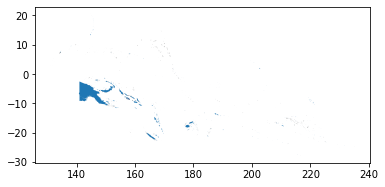

In [10]:
coastlines.plot()

In [11]:
# f, ax = plt.subplots(subplot_kw={'projection':ccrs.PlateCarree(central_longitude=200)}, figsize=(16,8))
# gdf.plot(ax=ax, column=step, cmap=plt.cm.rainbow, legend=True,transform=ccrs.PlateCarree(), \
#                                  legend_kwds={"pad":0.01, "shrink":0.7, "label":"acc. param - empirical"}, vmin=0.33, vmax=0.8)
# df.boundary.plot(ax=ax, lw=0.5, color='k', transform=ccrs.PlateCarree())
# # ax.coastlines(resolution='10m', lw=0.2)
# ax.set_extent([140, 200, -27, 0], crs=ccrs.PlateCarree())
# gl = ax.gridlines(draw_labels=True, linestyle=':', xlocs=np.arange(-180, 180, 10))
# gl.top_labels = False
# gl.right_labels = False

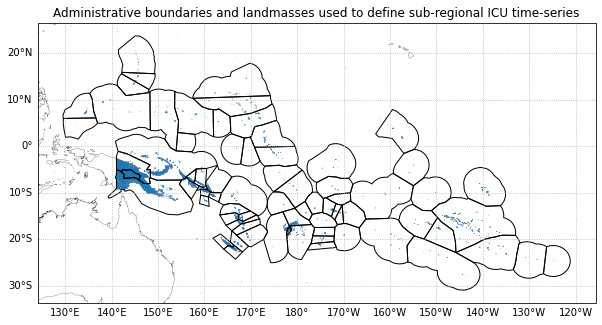

In [12]:
f, ax = plt.subplots(subplot_kw={'projection':ccrs.PlateCarree(central_longitude=200)}, figsize=(10,8))

ax.coastlines(resolution='10m', lw=0.2)

coastlines.plot(ax=ax, transform=ccrs.PlateCarree())

coastlines.boundary.plot(ax=ax, color='steelblue', lw=0.5, transform=ccrs.PlateCarree())

gdf.boundary.plot(ax=ax, lw=1, color='k', transform=ccrs.PlateCarree())

# ax.set_extent([140, 200, -27, 0], crs=ccrs.PlateCarree())

gl = ax.gridlines(draw_labels=True, linestyle=':', xlocs=np.arange(-180, 180, 10))
gl.top_labels = False
gl.right_labels = False
ax.set_title("Administrative boundaries and landmasses used to define sub-regional ICU time-series")

f.savefig('../../figures/ICU_validation/administrative_boundaries.png', dpi=200, bbox_inches='tight', facecolor='w')
f.savefig('../../figures/ICU_validation/administrative_boundaries.pdf', dpi=200, bbox_inches='tight', facecolor='w')

In [13]:
gdf.Country.unique()

array(['Northern Mariana Islands', 'Guam', 'Palau', 'FSM', 'Nauru',
       'Kiribati', 'Tokelau', 'Tonga', 'Cook Islands', 'American Samoa',
       'Samoa', 'Fiji', 'Vanuatu', 'New Caledonia', 'Solomon Islands',
       'Papua New Guinea', 'Wallis et Futuna', 'French Polynesia',
       'Tuvalu', 'Pitcairn', 'Niue', 'Marshall Islands'], dtype=object)

<ipython-input-16-f43ca2e73737>:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f, ax = plt.subplots(figsize=(10,10))


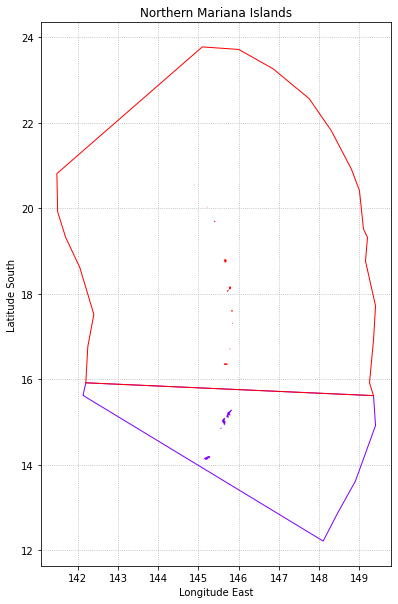

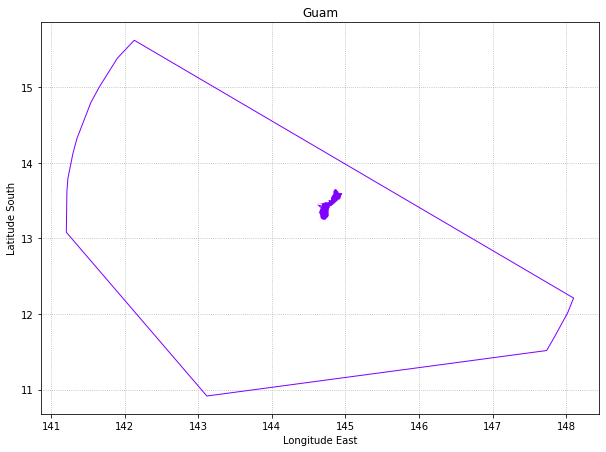

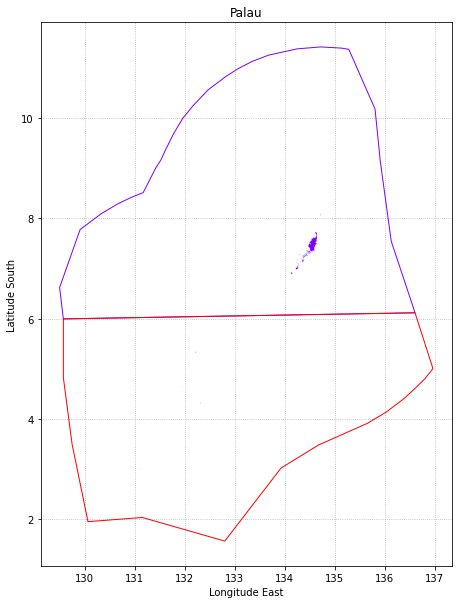

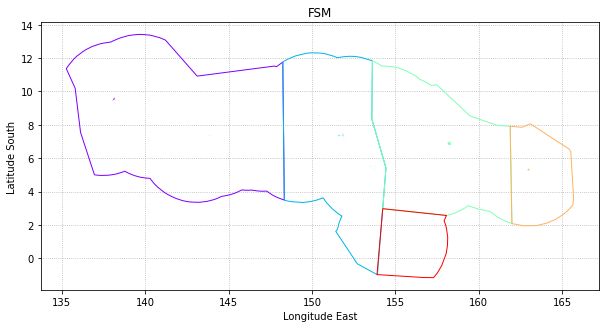

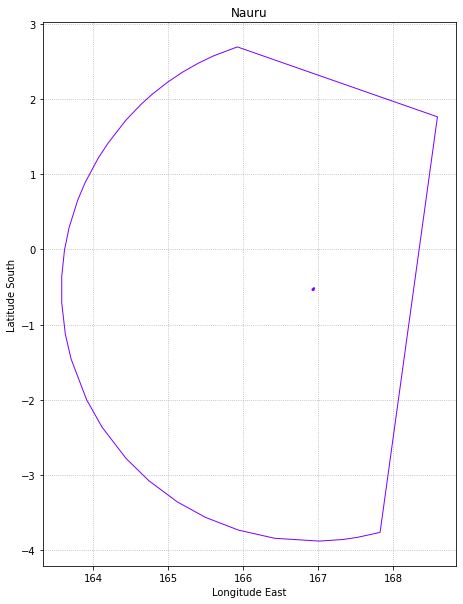

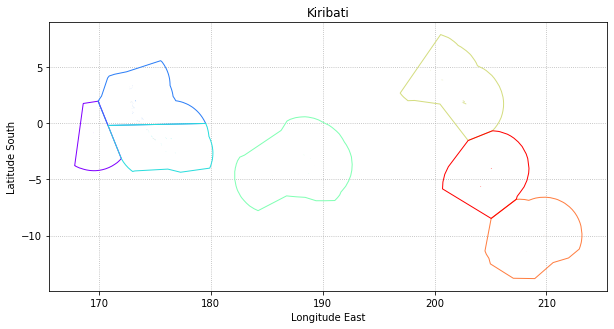

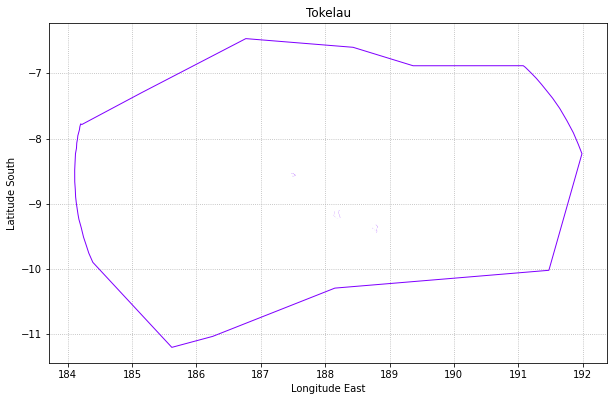

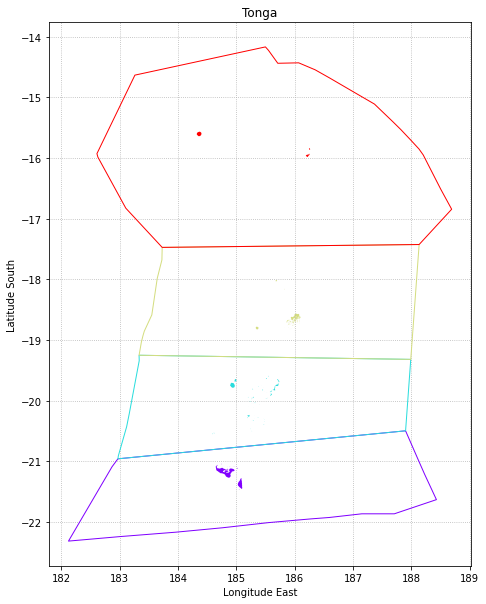

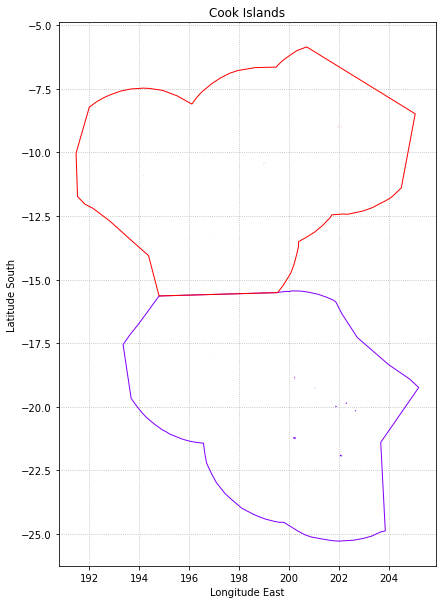

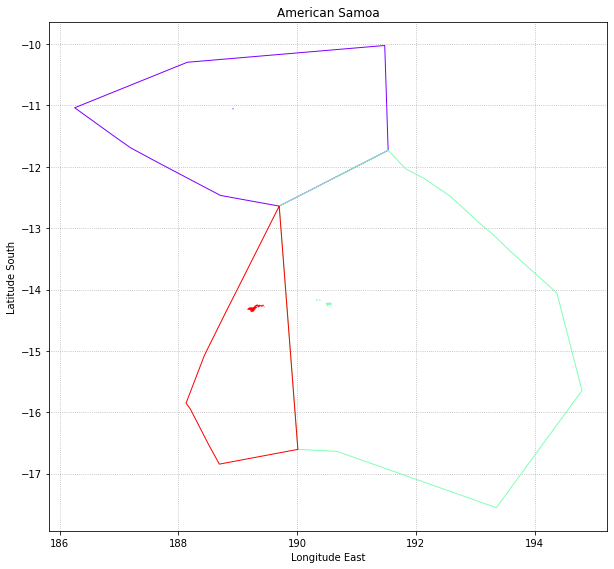

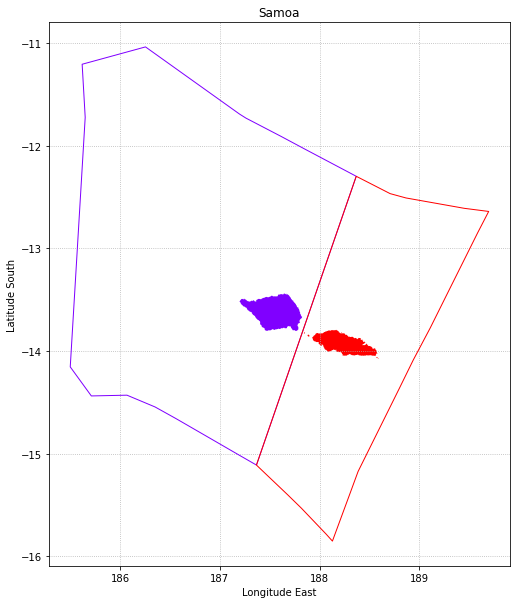

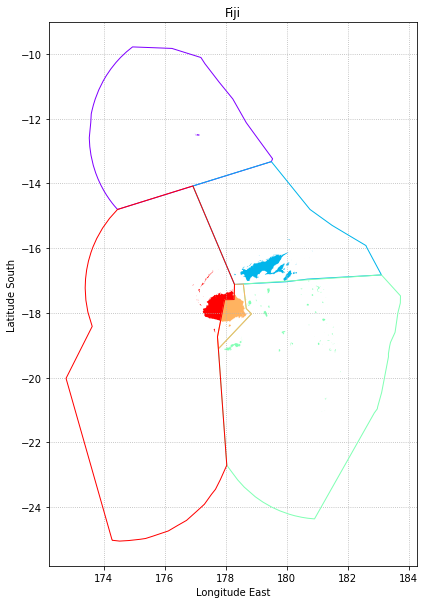

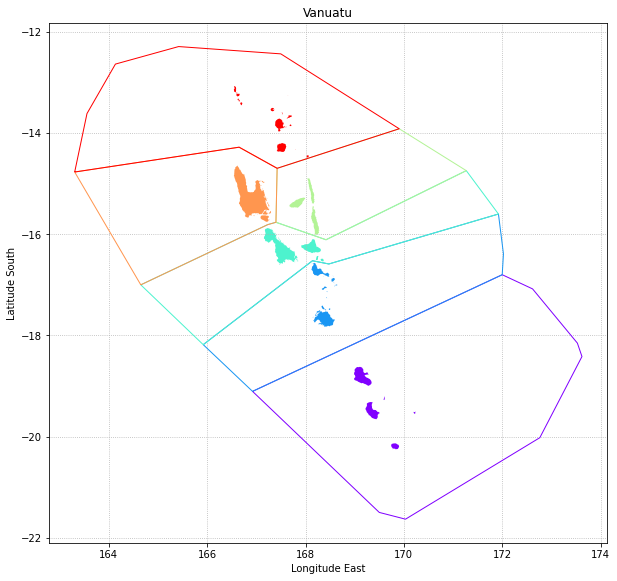

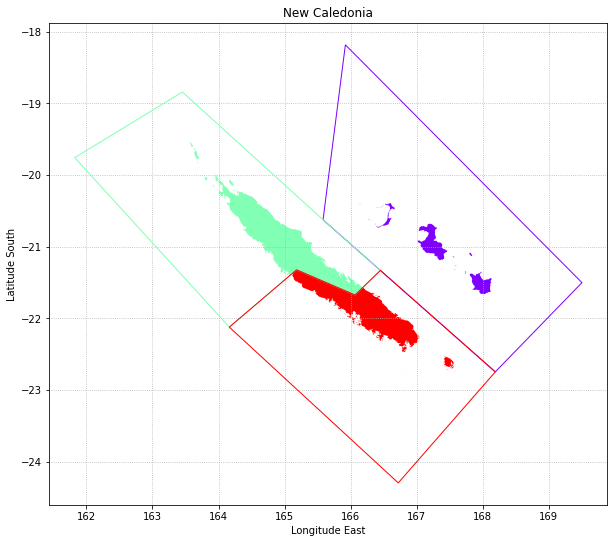

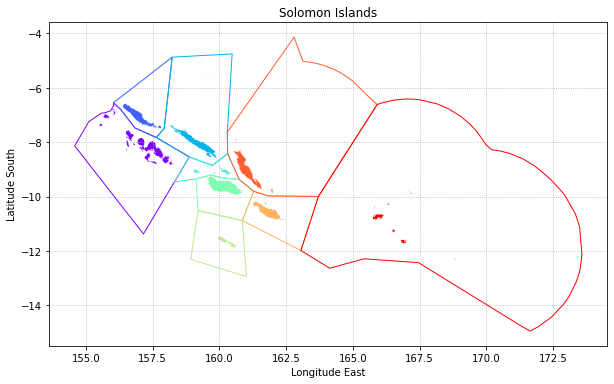

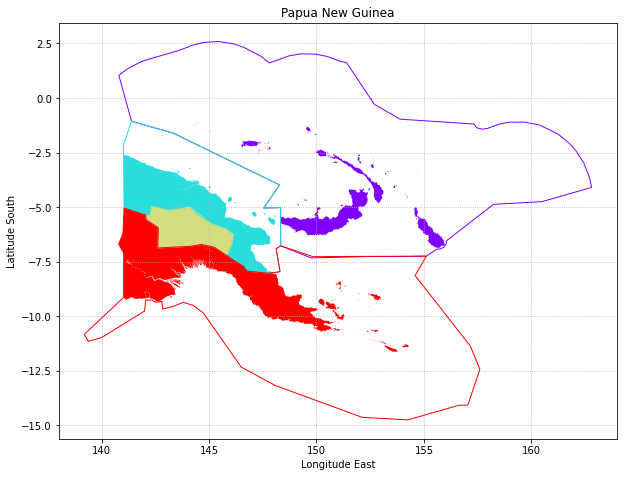

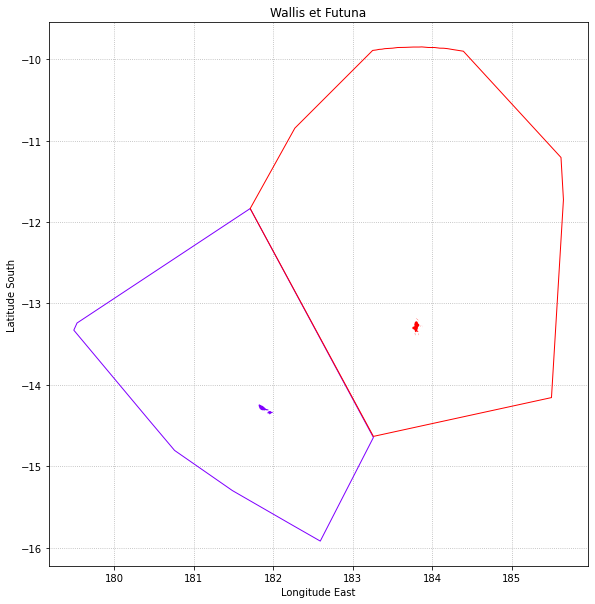

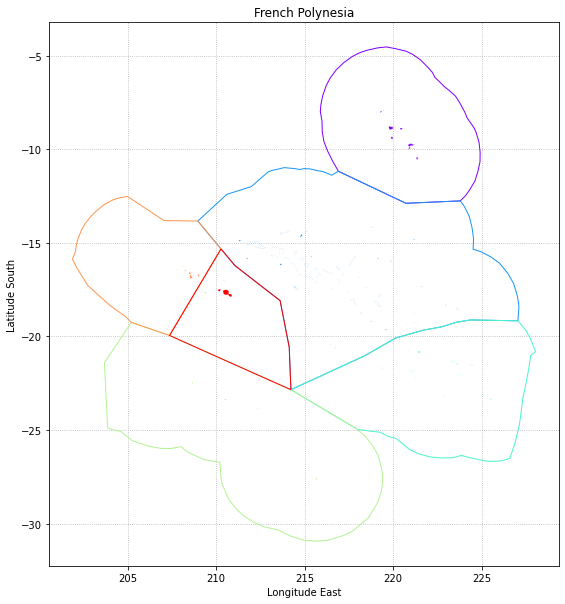

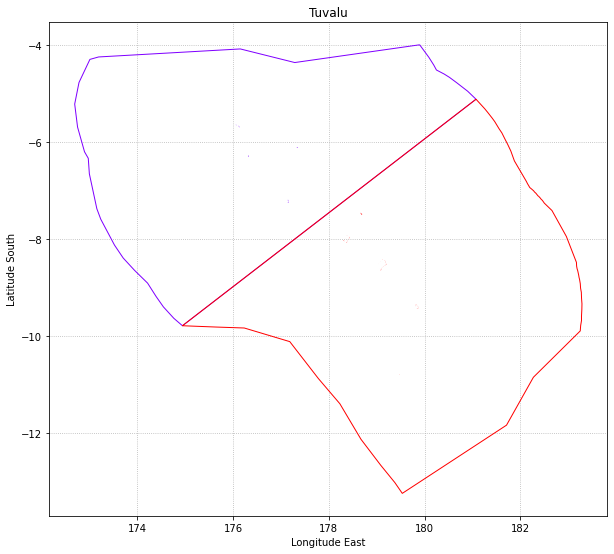

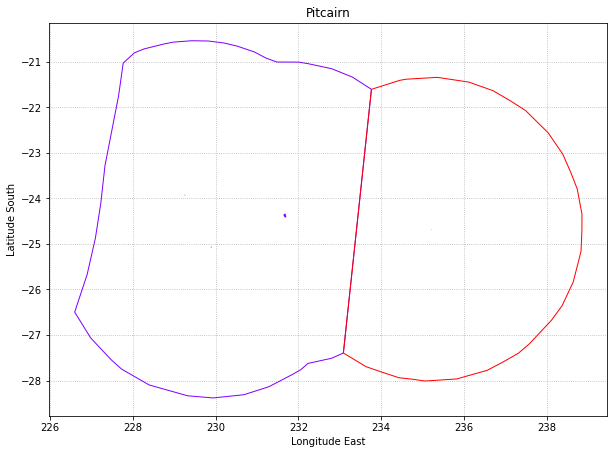

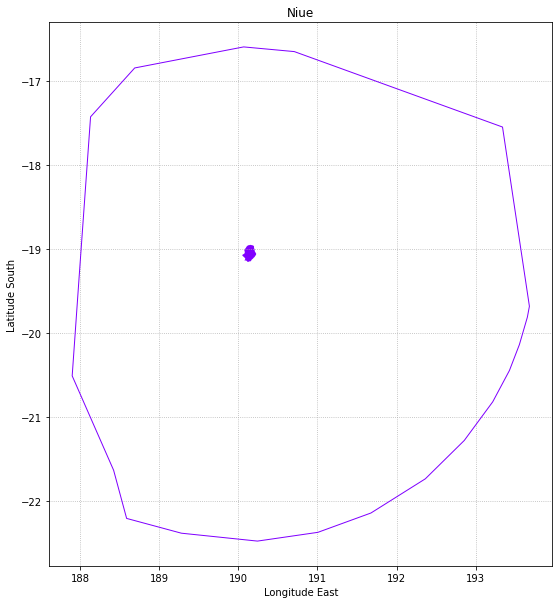

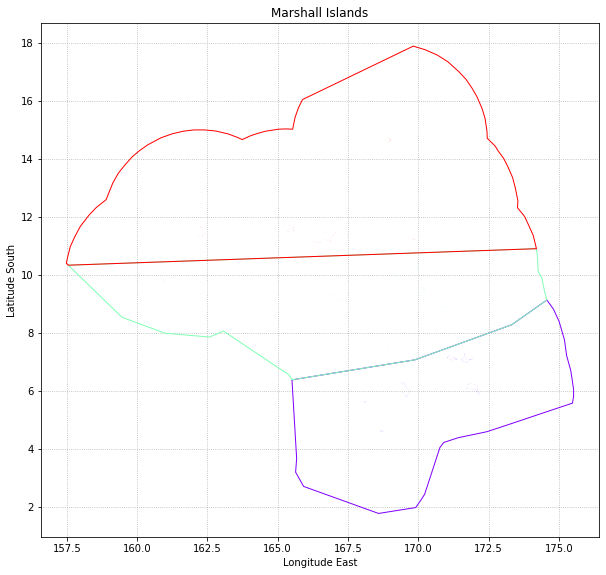

In [16]:
for country in gdf.Country.unique(): 
    
    g = gdf.query(f"Country == '{country}'")
    
    colors = plt.cm.rainbow(np.linspace(0, 1, len(g)))
    
    f, ax = plt.subplots(figsize=(10,10))
    
    for i in range(len(g)): 
        f = g.iloc[[i],:]
        x = gpd.overlay(f, coastlines)
        x.plot(ax=ax, color=colors[i])
        f.boundary.plot(ax=ax, color=colors[i], lw=1)
    
    ax.set_title(f"{country}")
    
    ax.grid(ls=':')
    
    ax.set_xlabel('Longitude East')
    ax.set_ylabel('Latitude South')

In [13]:
clipped = []
for i in range(len(gdf)): 
    f = gdf.iloc[[i],:]
    x = gpd.overlay(f, coastlines)
    clipped.append(x)

In [14]:
len(clipped)

73

In [15]:
len(gdf)

73

In [16]:
rdf = gpd.GeoDataFrame(pd.concat( clipped, ignore_index=True) )

In [17]:
rdf = rdf.loc[:,['id','Country','Admin_boun','geometry']]

/home/nicolasf/mambaforge/envs/climetlab/lib/python3.8/site-packages/geopandas/plotting.py:658: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=figsize)


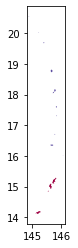

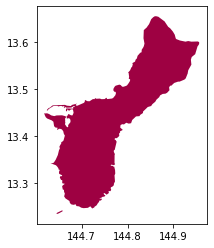

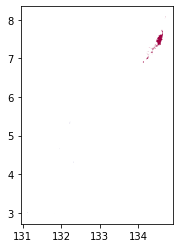

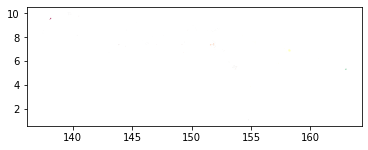

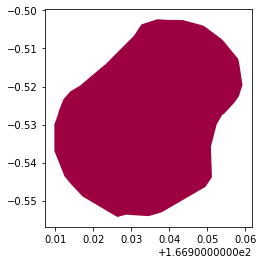

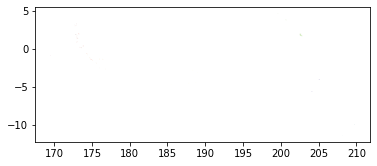

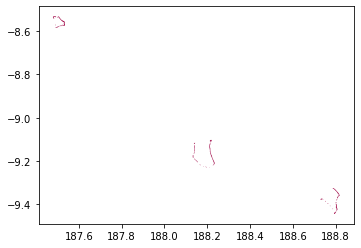

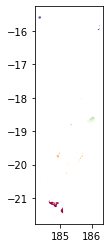

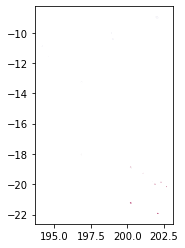

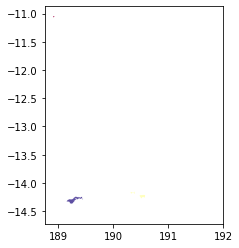

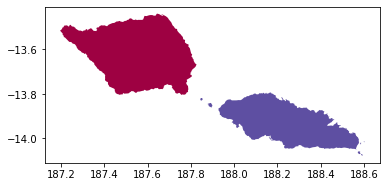

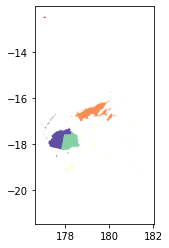

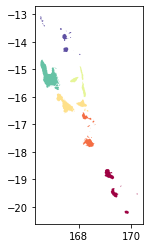

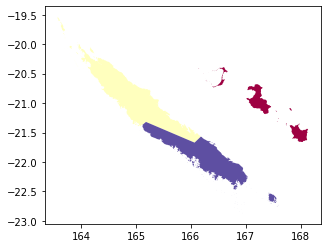

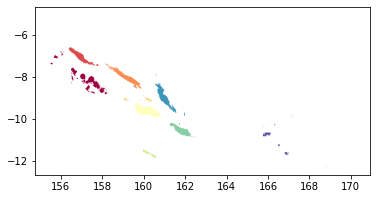

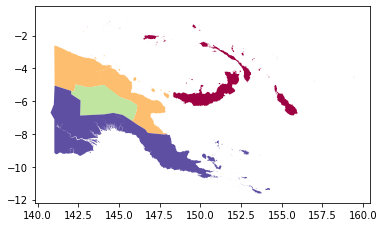

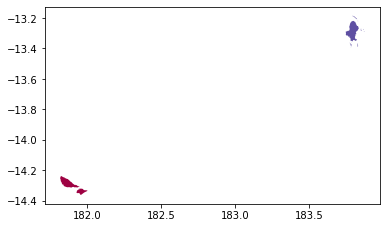

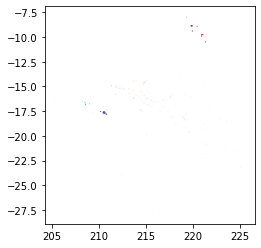

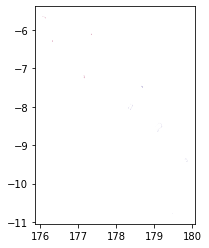

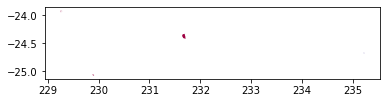

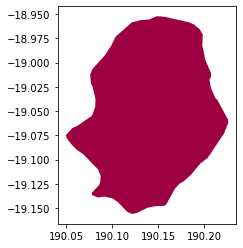

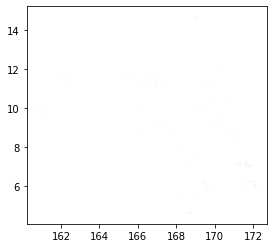

In [18]:
for country in rdf.Country.unique(): 
    d = rdf.query(f"Country == '{country}'")
    d.plot(cmap=plt.cm.Spectral)

In [19]:
rdf.to_file('/home/nicolasf/operational/ICU/development/hotspots/data/shapefiles/Admin_boundaries/Coastlines/ICU_admin_geometries0_360.shp')

### read the validation data 

In [11]:
gdf

,id,Country,Admin_boun,geometry
0,1,Northern Mariana Islands,Southern Islands,"POLYGON ((142.130 15.621, 142.130 15.621, 142...."
1,2,Northern Mariana Islands,Northern Islands,"POLYGON ((142.200 15.916, 142.250 16.766, 142...."
2,3,Guam,Guam,"POLYGON ((142.130 15.621, 148.099 12.212, 148...."
3,4,Palau,Babeldaob region,"POLYGON ((129.499 6.623, 129.909 7.779, 130.33..."
4,5,Palau,South-west Islands,"POLYGON ((129.574 5.998, 136.605 6.119, 136.96..."
...,...,...,...,...
68,24,Cook Islands,Northern Cook Islands,"POLYGON ((200.712 -5.847, 205.058 -8.479, 204...."
69,70,FSM,Kapingamarangi,"POLYGON ((158.054 2.568, 157.915 2.251, 158.01..."
70,71,Marshall Islands,Southern Marshall Islands,"POLYGON ((165.507 6.376, 169.881 7.066, 173.32..."
71,72,Marshall Islands,Central Marshall Islands,"POLYGON ((157.549 10.331, 174.204 10.901, 174...."


In [12]:
validation_data = pd.read_csv('/home/nicolasf/Desktop/seasonal_ICU_C3S_MME_tercile_forecast_table_2021_09.csv', index_col=0, header=[0,1])